In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.fft import fft, fftfreq
plt.style.use("plot_style.mplstyle")

In [2]:
def smooth_triangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

In [3]:
pol_roc = pd.read_csv('pol_roc_data_1.csv')

roc_norm = np.median(pol_roc['amp'].values[0:20000])

N = len(pol_roc['time'])
dt = np.diff(pol_roc["time"].values)[0] 
amp = pol_roc["amp"].values/roc_norm
freq = fftfreq(N, dt)
amp_fft = fft(amp)

angle = np.arccos(np.sqrt(np.clip(np.abs(amp), 0.0, 1.0)))/np.pi
angle_fft = fft(angle)
time_deriv = np.gradient(angle,dt)

angle_smooth = smooth_triangle(angle, 100)
time_deriv_smooth = np.gradient(angle_smooth,dt)

print(f'ROC normalisation: {roc_norm*1e3:0.2f} mV')
print(f'Time step: {dt*1e6:0.2f} us, Sampling rate: {1/dt/1e6:0.2f} MHz')

ROC normalisation: 17.43 mV
Time step: 0.10 us, Sampling rate: 10.00 MHz


/var/folders/gl/2rnst3qn1ybbrqznnrfypxkw0000gn/T/ipykernel_32312/823557377.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


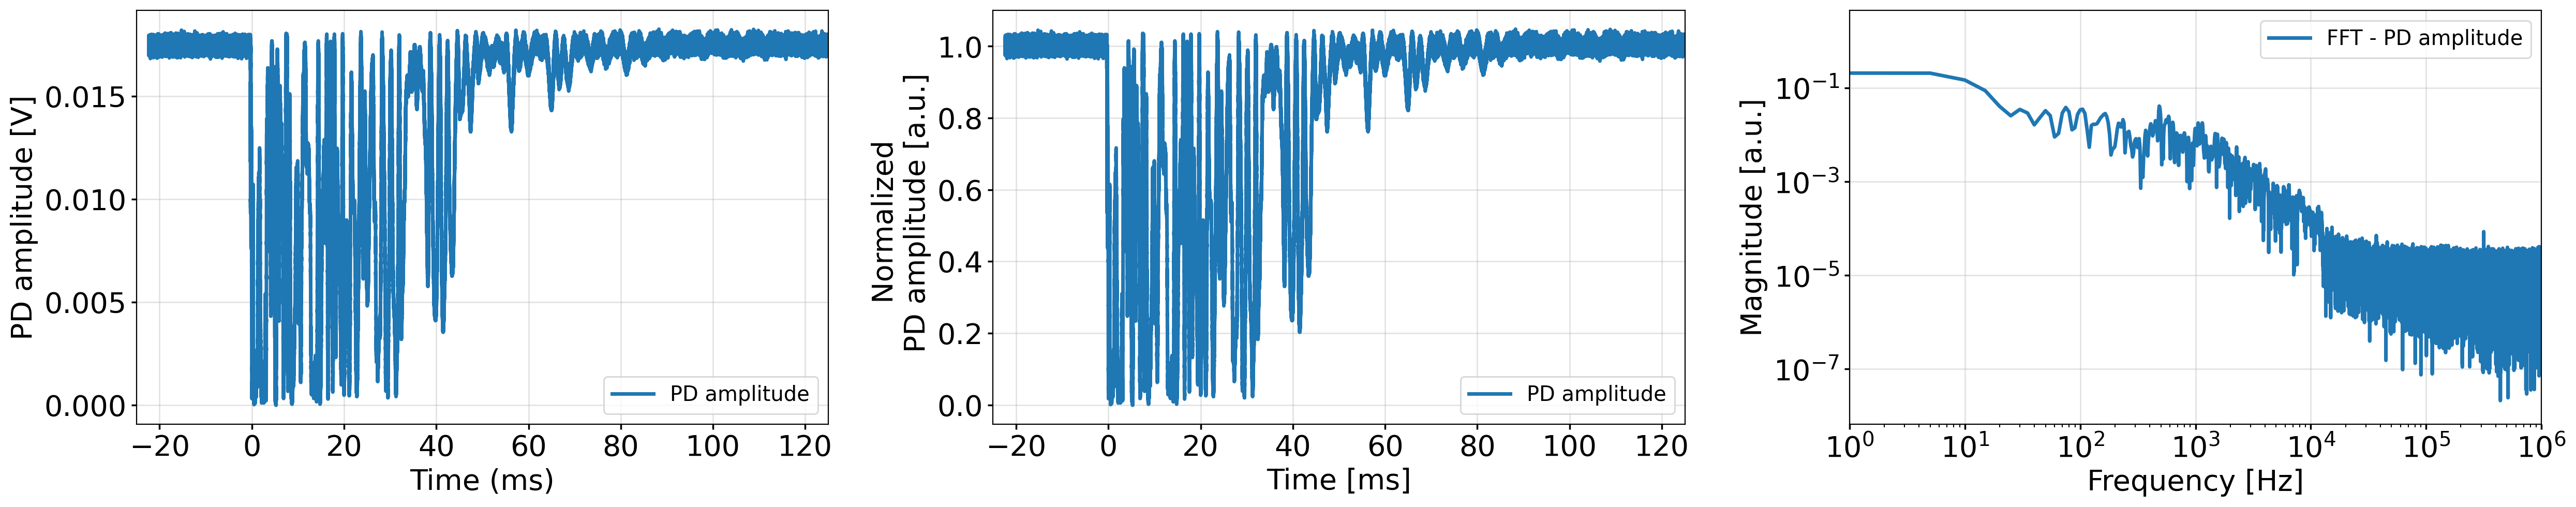

In [4]:
plt.figure(figsize=(25,5))
plt.subplot(131)
plt.plot(pol_roc['time']*1e3, pol_roc["amp"].values, label='PD amplitude')
plt.xlim([-25, 125])
plt.grid(True)
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('PD amplitude [V]')
plt.subplot(132)
plt.plot(pol_roc['time']*1e3, amp, label='PD amplitude')
plt.xlim([-25, 125])
plt.grid(True)
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel('Normalized \n PD amplitude [a.u.]')
plt.subplot(133)
plt.loglog(freq[:N//2],np.abs(amp_fft[:N//2])*2/N, label='FFT - PD amplitude')
plt.xlim([1, 1e6])
plt.grid(True)
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [a.u.]')
plt.tight_layout()

In [5]:
print(f'Max amplitude: {roc_norm*1e3:0.2f} mV, Min amplitude: {np.abs(np.min(pol_roc["amp"].values)*1e3):0.2f} mV')

Max amplitude: 17.43 mV, Min amplitude: 0.02 mV


/var/folders/gl/2rnst3qn1ybbrqznnrfypxkw0000gn/T/ipykernel_32312/4284761572.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


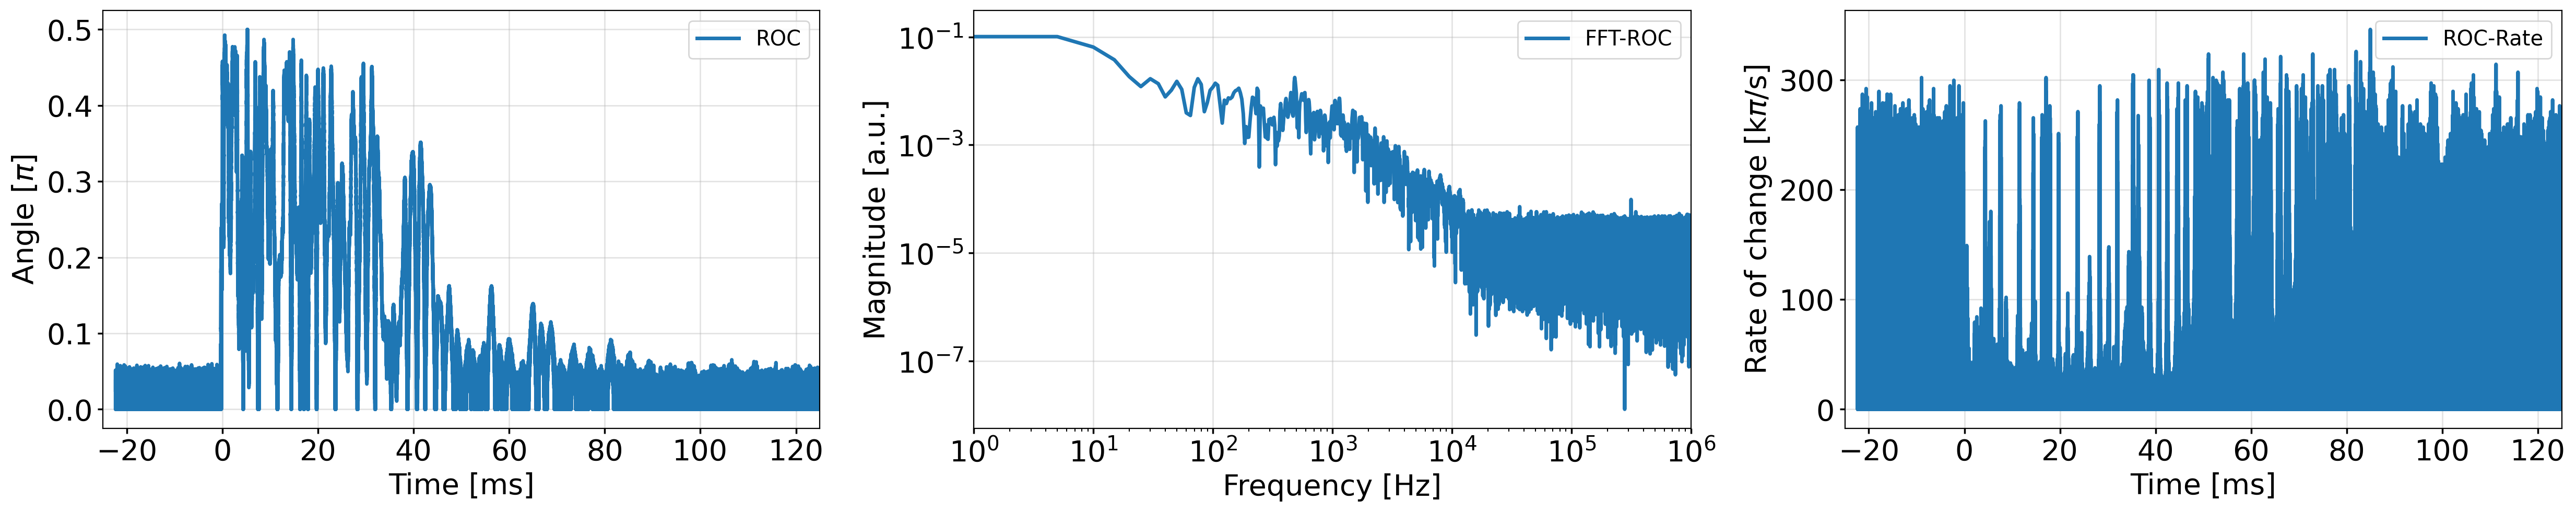

In [6]:
plt.figure(figsize=(25,5))
plt.subplot(131)
plt.plot(pol_roc['time']*1e3, angle, label='ROC')
plt.xlim([-25, 125])
plt.grid(True)
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel(r'Angle [$\pi$]')
plt.subplot(132)
plt.loglog(freq[:N//2],np.abs(angle_fft[:N//2]*2/N), label='FFT-ROC')
plt.xlim([1, 1e6])
plt.grid(True)
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [a.u.]')
plt.subplot(133)
plt.plot(pol_roc['time']*1e3, np.abs(time_deriv/1e3), label='ROC-Rate')
plt.legend()
plt.xlabel('Time [ms]')
plt.ylabel(r'Rate of change [k$\pi$/s]')
plt.xlim([-25, 125])
plt.grid(True)
plt.tight_layout()

/var/folders/gl/2rnst3qn1ybbrqznnrfypxkw0000gn/T/ipykernel_32312/1499686240.py:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


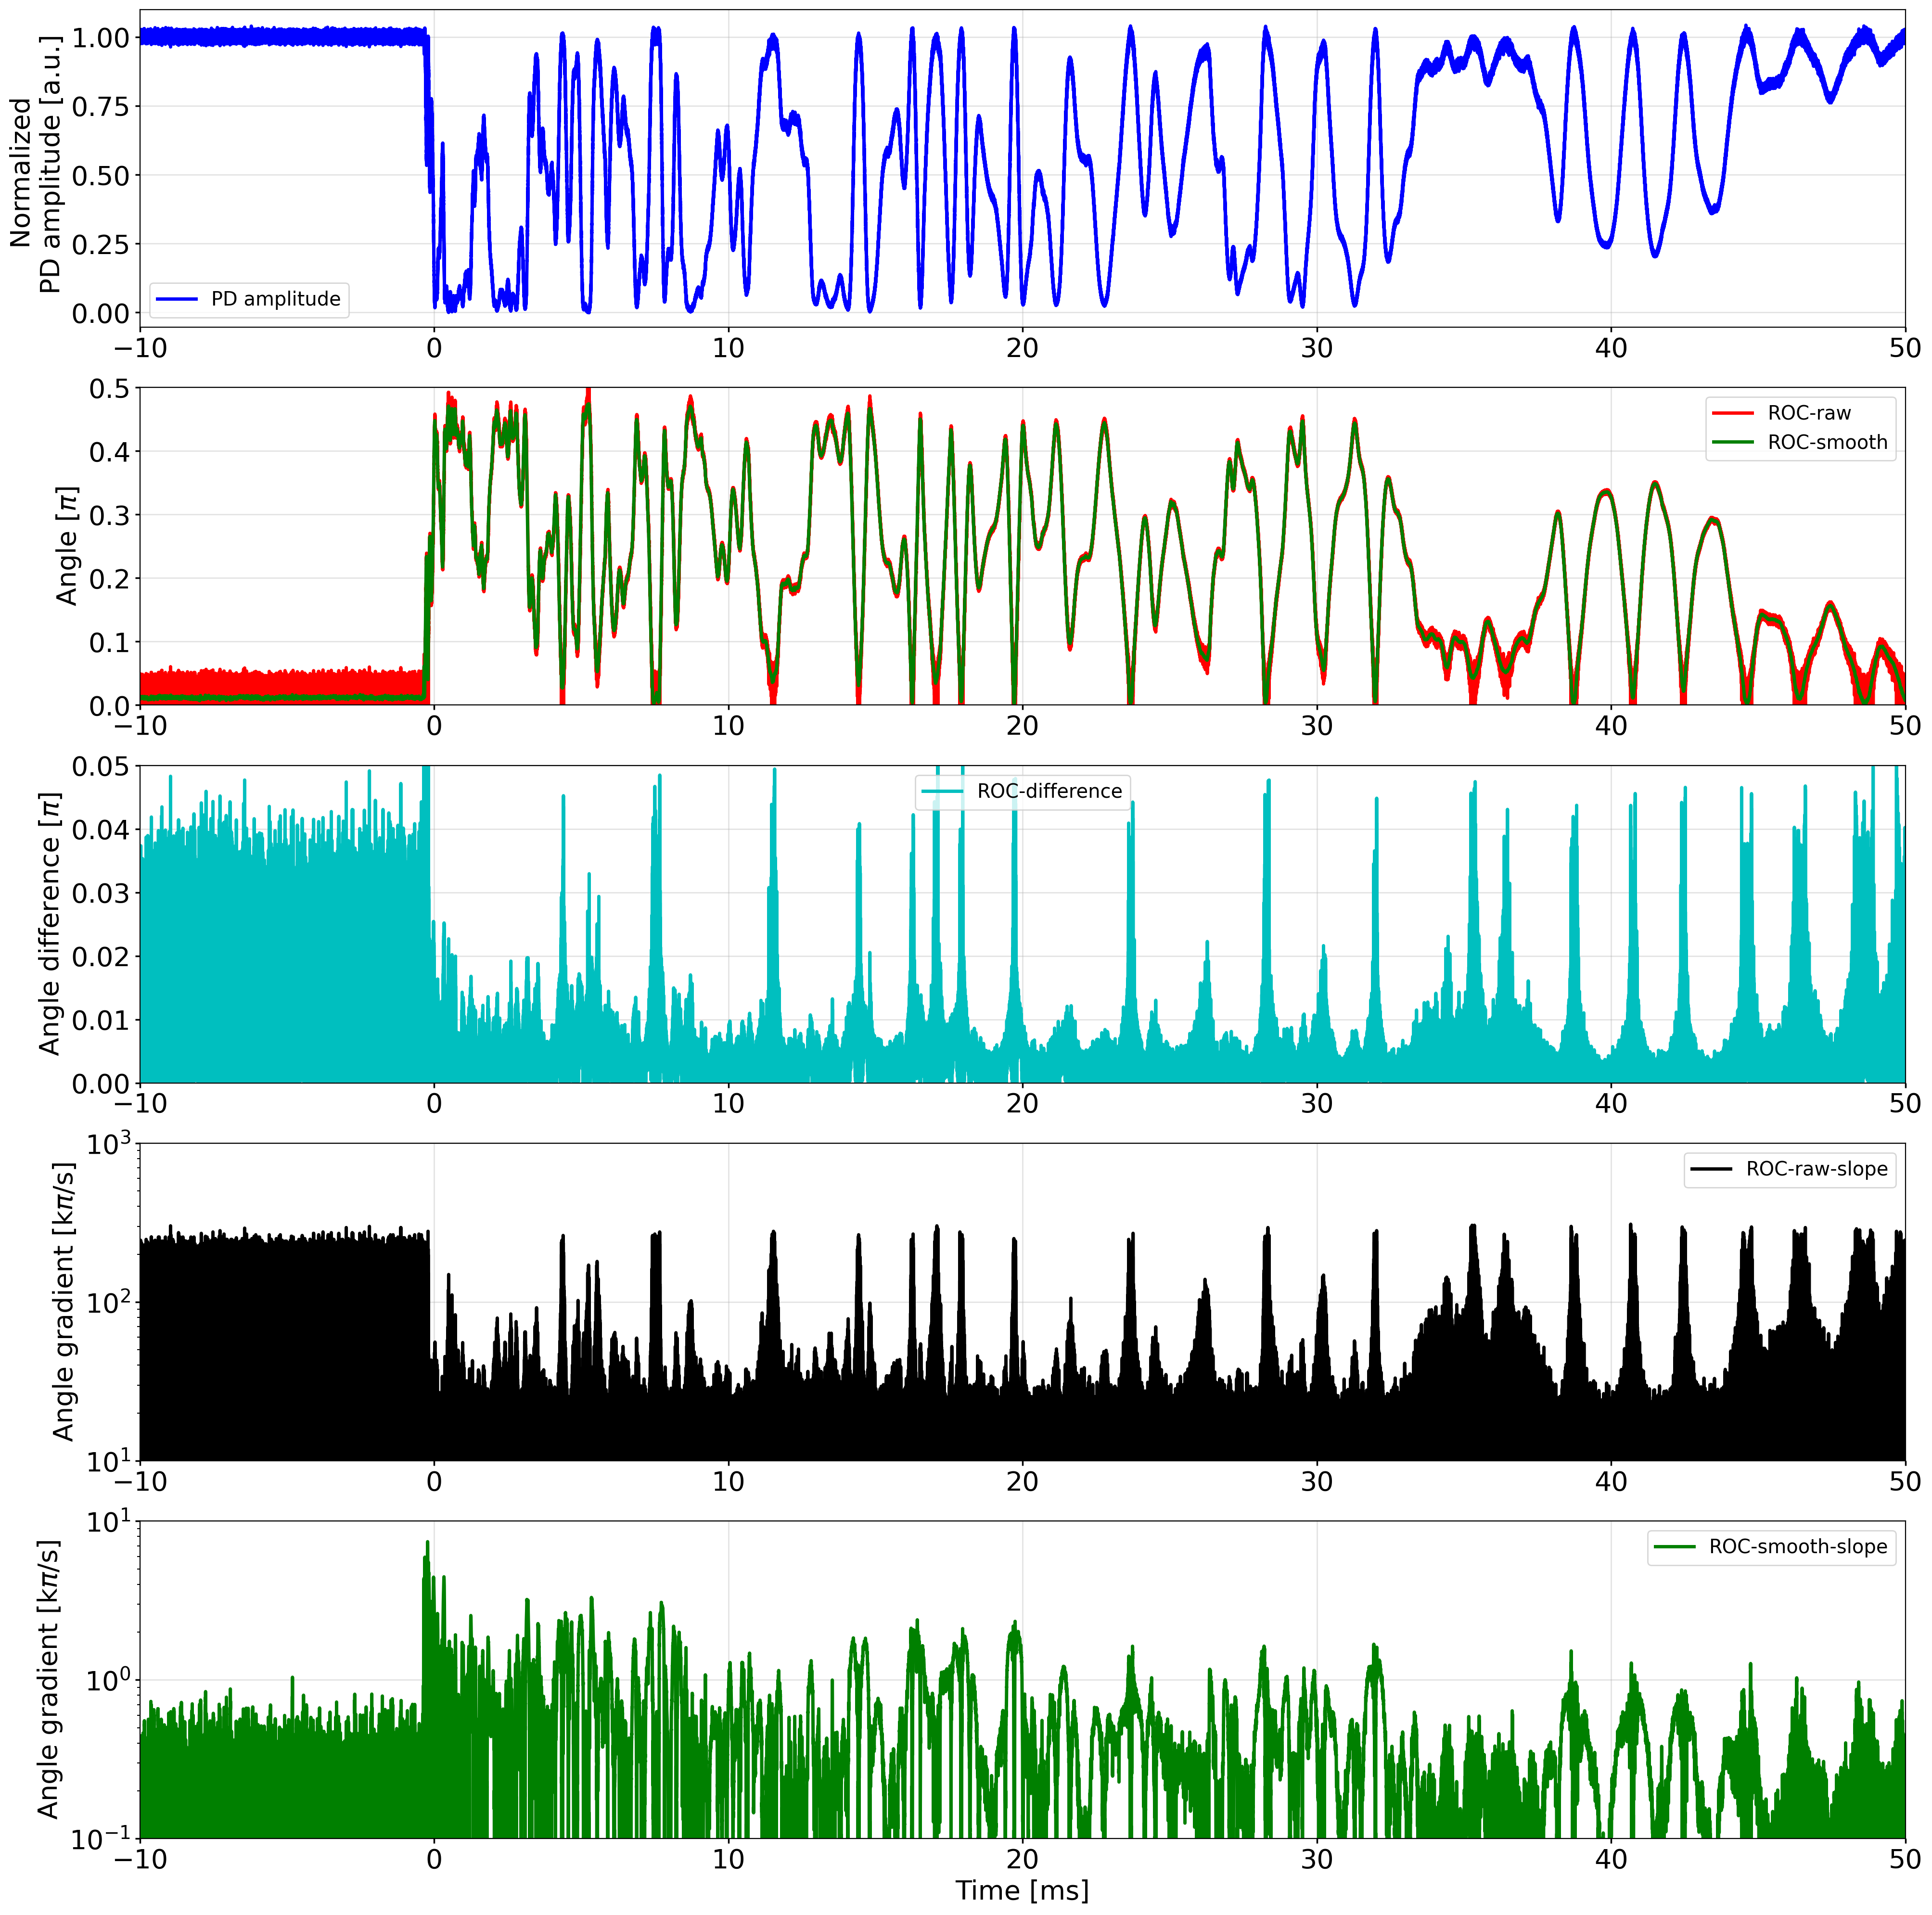

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(511)
plt.plot(pol_roc['time']*1e3, pol_roc['amp'].values/roc_norm, color='b', label='PD amplitude')
plt.ylabel('Normalized \n PD amplitude [a.u.]')
plt.grid(True)
plt.legend()
plt.xlim([-10, 50])


plt.subplot(512)
plt.plot(pol_roc['time']*1e3, angle, color='r', label='ROC-raw')
plt.plot(pol_roc['time']*1e3, angle_smooth, color='g', label='ROC-smooth')
plt.ylabel(r'Angle [$\pi$]')
plt.ylim([0,0.5])
plt.grid(True)
plt.xlim([-10, 50])
plt.legend()


plt.subplot(513)
plt.plot(pol_roc['time']*1e3, np.abs(angle - angle_smooth), color='c', label='ROC-difference')
plt.ylabel(r'Angle difference [$\pi$]')
plt.ylim([0,0.05])
plt.grid(True)
plt.legend()
plt.xlim([-10, 50])

plt.subplot(514)
plt.semilogy(pol_roc['time']*1e3, np.abs(time_deriv/1e3), color='k', label='ROC-raw-slope')
plt.ylim([1e1, 1e3])
plt.ylabel(r'Angle gradient [k$\pi$/s]')
plt.legend()
plt.grid(True)
plt.xlim([-10, 50])

plt.subplot(515)
plt.semilogy(pol_roc['time']*1e3, np.abs(time_deriv_smooth/1e3), color='g', label='ROC-smooth-slope')
plt.ylabel(r'Angle gradient [k$\pi$/s]')
plt.xlabel('Time [ms]')
plt.legend()
plt.grid(True)
plt.xlim([-10, 50])
plt.ylim([1e-1, 1e1])

plt.tight_layout()

/var/folders/gl/2rnst3qn1ybbrqznnrfypxkw0000gn/T/ipykernel_32312/3703317803.py:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


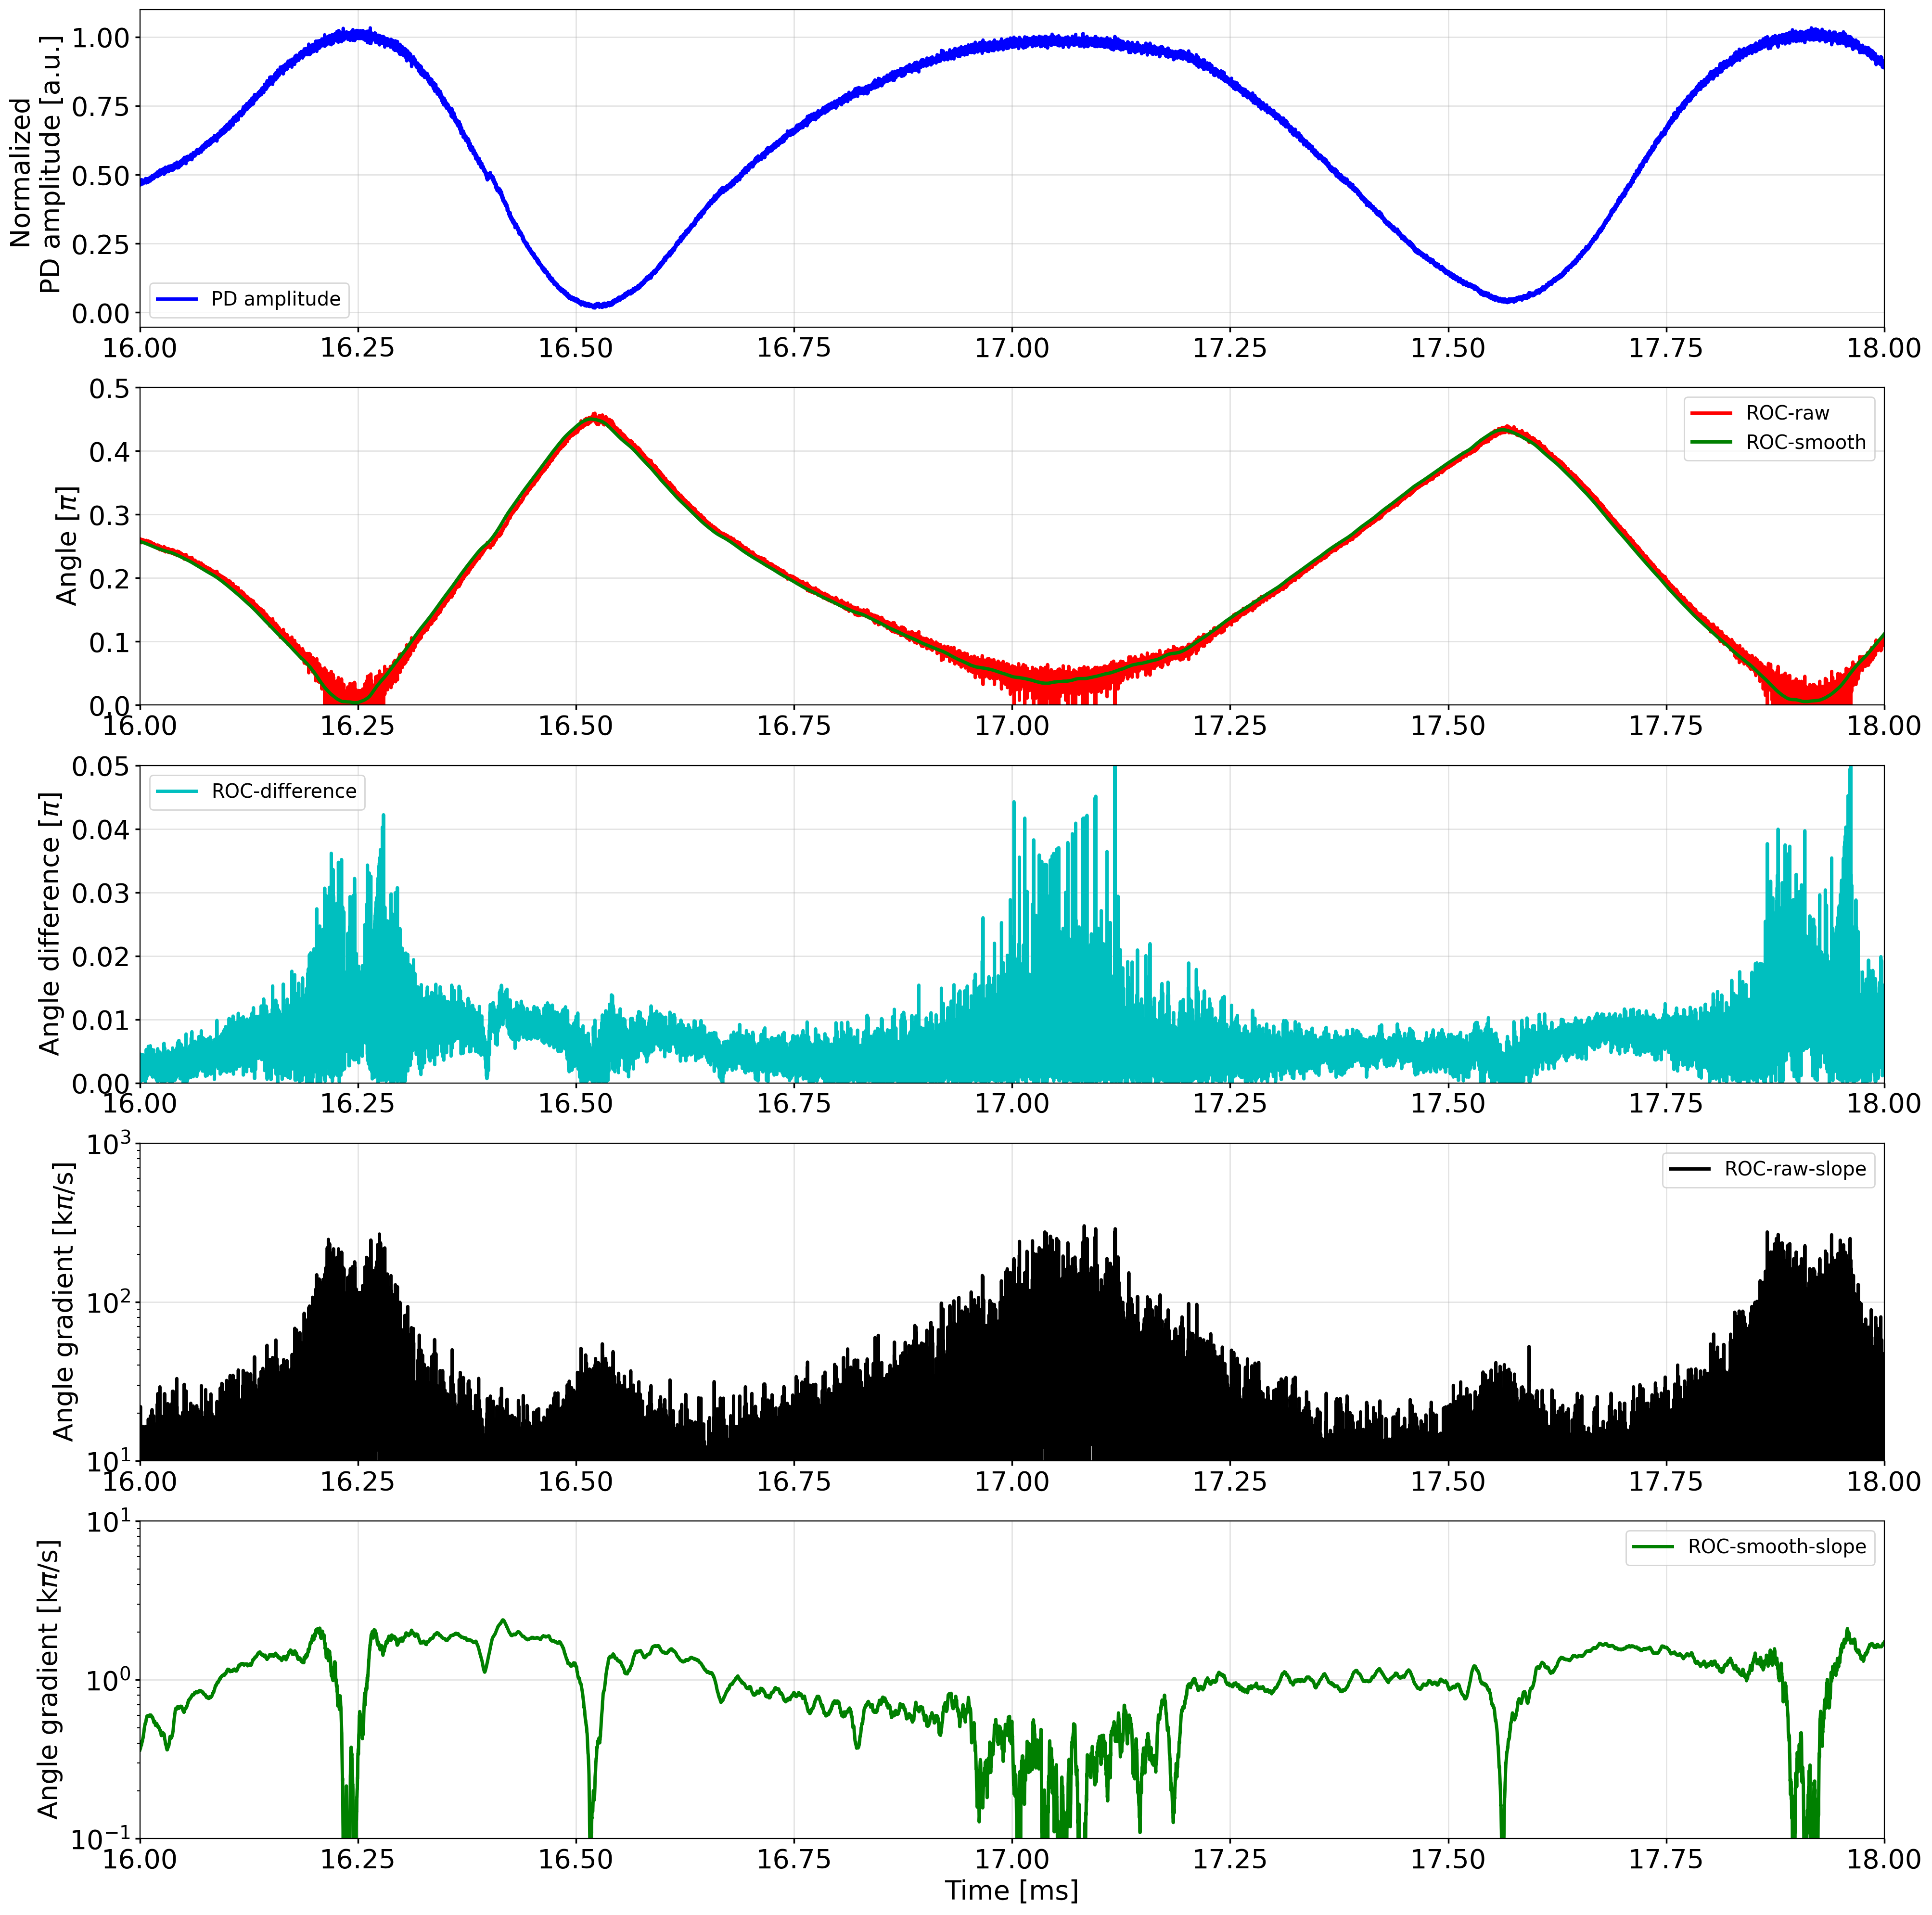

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(511)
plt.plot(pol_roc['time']*1e3, pol_roc['amp'].values/roc_norm, color='b', label='PD amplitude')
plt.ylabel('Normalized \n PD amplitude [a.u.]')
plt.grid(True)
plt.legend()
plt.xlim([16, 18])


plt.subplot(512)
plt.plot(pol_roc['time']*1e3, angle, color='r', label='ROC-raw')
plt.plot(pol_roc['time']*1e3, angle_smooth, color='g', label='ROC-smooth')
plt.ylabel(r'Angle [$\pi$]')
plt.ylim([0,0.5])
plt.grid(True)
plt.xlim([16, 18])
plt.legend()


plt.subplot(513)
plt.plot(pol_roc['time']*1e3, np.abs(angle - angle_smooth), color='c', label='ROC-difference')
plt.ylabel(r'Angle difference [$\pi$]')
plt.ylim([0,0.05])
plt.grid(True)
plt.legend()
plt.xlim([16, 18])

plt.subplot(514)
plt.semilogy(pol_roc['time']*1e3, np.abs(time_deriv/1e3), color='k', label='ROC-raw-slope')
plt.ylim([1e1, 1e3])
plt.ylabel(r'Angle gradient [k$\pi$/s]')
plt.legend()
plt.grid(True)
plt.xlim([16, 18])

plt.subplot(515)
plt.semilogy(pol_roc['time']*1e3, np.abs(time_deriv_smooth/1e3), color='g', label='ROC-smooth-slope')
plt.ylabel(r'Angle gradient [k$\pi$/s]')
plt.xlabel('Time [ms]')
plt.legend()
plt.grid(True)
plt.xlim([16, 18])
plt.ylim([1e-1, 1e1])

plt.tight_layout()